In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

import seaborn as sns

%matplotlib inline

In [40]:
data = pd.read_csv('data/listing_formatted_hr_vol_fac_removed.csv', dtype = {'hit_rate': np.float64})

C:\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2683: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
pure_data = data[data.columns[31:]].drop('volatility', axis = 1).dropna()

In [74]:
y = pure_data['hit_rate'].values
X_raw = pure_data.copy().drop('hit_rate', axis = 1)
X_features = X_raw.columns
X = X_raw.values

In [56]:
train_test_split = round(len(y) * 0.7)
X_train = X[:train_test_split]
y_train = y[:train_test_split]
X_test = X[train_test_split:]
y_test = y[train_test_split:]

# Random Forest Regressor

In [63]:
param_grid = [
    {'n_estimators':[10, 15, 20, 30], 'max_depth': [5, 10, 15, 20]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 3, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 15, 20, 30], 'max_depth': [5, 10, 15, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

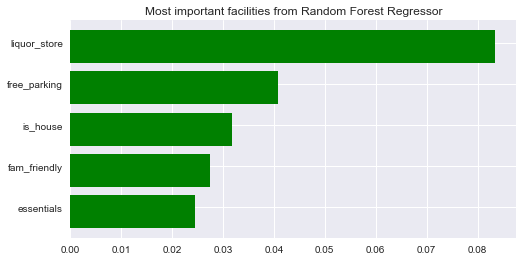

In [102]:
rfr_imp = pd.DataFrame({'feature' : X_features, 'importance' : grid_search.best_estimator_.feature_importances_}).sort_values(by = 'importance', ascending = False)
rfr_imp_top = rfr_imp[:5]
fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot(111)
width = 0.2
ind = np.arange(4, -1, -1)
ax.barh(ind, rfr_imp.importance[:5], color = 'green')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(rfr_imp['feature'][:5])
ax.set_title('Most important facilities from Random Forest Regressor')

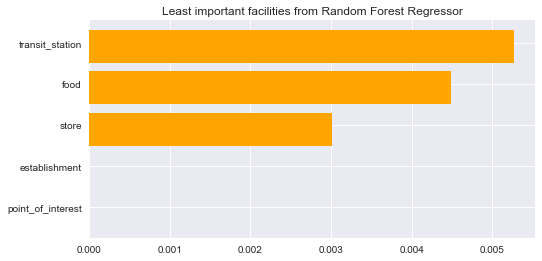

In [103]:
rfr_imp_bot = rfr_imp[-5:]
fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot(111)
width = 0.2
ind = np.arange(4, -1, -1)
ax.barh(ind, rfr_imp_bot.importance, color = 'orange')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(rfr_imp['feature'][-5:])
ax.set_title('Least important facilities from Random Forest Regressor')

In [112]:
best_model = grid_search.best_estimator_

In [113]:
y_predict = best_model.predict(X_test)

In [114]:
forest_err = mean_squared_error(y_test, y_predict)

In [115]:
forest_err

0.14412062741920753

# SVM Regressor - linear kernel

In [124]:
sv_reg_poly = SVR(kernel = 'poly')
sv_reg_poly.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [125]:
y_predict = sv_reg_poly.predict(X_test)
poly_err = mean_squared_error(y_test, y_predict)

In [126]:
poly_err

0.16072835488714599

# SVM Regressor - rbf kernel

In [108]:
sv_reg = SVR()
sv_reg.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [116]:
y_predict = sv_reg.predict(X_test)
rbf_err = mean_squared_error(y_test, y_predict)

In [117]:
rbf_err

0.15736927614673601

# Comparison of models

In [127]:
comp = pd.DataFrame({'Model' : np.array(['Random Forest', 'SVR Polynomial Kernel', 'SVR RBF Kernel']), 'Error' : np.array([forest_err, poly_err, rbf_err])})

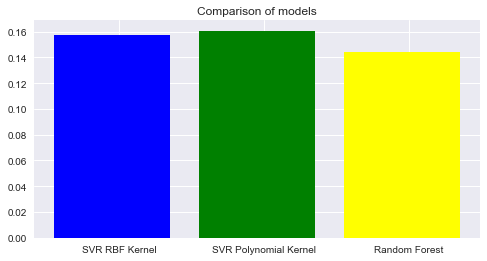

In [132]:
fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot(111)
width = 0.1
ind = np.arange(2, -1, -1)
ax.bar(ind, comp.Error, color = ['yellow', 'green', 'blue'])
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(comp['Model'])
ax.set_title('Comparison of models')